Analyzing my personal strava data to estimate my future race performace

Questions I want to answer:
- Have I gotten faster
- Do hills / elevation truly affect my speed
- How does distance affect my speed


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Data was downloaded from https://www.strava.com/athlete/download_request, unziped, and light data exploartion showed that out of the 38 csv files activities.csv held the raw data I needed. 

In [10]:

# load activities CSV (adjust filename if needed)
df = pd.read_csv('activities.csv')
dfM = df.copy()

In [11]:
df

,Activity ID,Activity Date,Activity Name,Activity Type,Activity Description,Elapsed Time,Distance,Max Heart Rate,Relative Effort,Commute,...,Intensity,Average Grade Adjusted Pace,Timer Time,Total Cycles,Recovery,With Pet,Competition,Long Run,For a Cause,Media
0,13124889853,"Dec 15, 2024, 11:29:06 PM",Prelude,Run,"Ate 5 cookies and felt guilty, but I AM BACK",6329,16.36,NaN,NaN,False,...,NaN,3.159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,media/56A56CAA-7537-47AB-A764-31B45AA6B141.jpg...
1,13178383456,"Dec 24, 2024, 1:57:27 AM",Fat man run,Run,NaN,3638,4.82,NaN,NaN,False,...,NaN,1.528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13196474382,"Dec 26, 2024, 1:50:22 PM",Mountain hike,Run,NaN,1099,1.02,NaN,NaN,False,...,NaN,2.627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,media/C760A05A-1389-4EB6-96FC-97A38DC2DA67.jpg...
3,13257314504,"Jan 3, 2025, 5:55:53 PM",Light run with tyan,Run,road to 500mi !!!,2452,6.51,NaN,NaN,False,...,NaN,2.850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,media/6CD016E7-1097-495E-906E-897C0E209567.jpg...
4,13600552223,"Feb 11, 2025, 3:43:33 PM",Lite ting,Run,"First run in new shoes, took a while tp get us...",3102,6.97,NaN,NaN,False,...,NaN,2.652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,media/7E33D434-EC5A-4397-A206-D17D8BB5E946.jpg...
5,13634498697,"Feb 15, 2025, 2:05:50 PM",Mr. Moiz Marathon,Run,very light campus run cuz greenway was FLOODED,3085,7.93,NaN,NaN,False,...,NaN,2.685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,media/374B56FE-48C7-4437-A62C-CB700012C939.jpg...
6,13879572401,"Mar 14, 2025, 11:11:38 AM",Denis and Friend Jog,Run,"had to stop a ton cuz of anton, but still had ...",3450,9.14,NaN,NaN,False,...,NaN,2.759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,14233461921,"Apr 20, 2025, 1:52:14 PM",Ruin Run,Run,Lot of fun!,1461,4.96,NaN,NaN,False,...,NaN,3.892,NaN,NaN,NaN,NaN,NaN,NaN,NaN,media/07F23CB2-8F38-4C4D-86BF-9B2D0ABB3EF4.jpg...
8,14322705991,"Apr 29, 2025, 2:34:44 PM",warmup to next post,Run,NaN,497,1.78,NaN,NaN,False,...,NaN,3.708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,14322809190,"Apr 29, 2025, 2:47:24 PM",85% effort mile,Run,"honestly, I’m pretty surprised at how fast I a...",395,1.83,NaN,NaN,False,...,NaN,4.579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,media/2D735961-B2A4-4F5E-9410-5C48F8515960.jpg...


df

In [12]:
# data cleaning
# Cols: 	Activity ID	Activity Date	Activity Name	Activity Type	Activity Description	Elapsed Time	Distance	Max Heart Rate	Relative Effort	Commute	...	Intensity	Average Grade Adjusted Pace	Timer Time	Total Cycles	Recovery	With Pet	Competition	Long Run	For a Cause	Media

# drop cols that are not needed by selecting relevant ones

df = dfM.copy()

relevant_cols = [
    'Activity Date', 'Activity Name', 'Activity Type',
    'Elapsed Time', 'Distance', 'Moving Time', 'Elevation Gain', 'Elevation Loss', 'Calories', 
    'Grade Adjusted Distance', 'Total Steps', 'Average Grade Adjusted Pace'
]
df = df[relevant_cols]

# convert 'Activity Date' to datetime
df['Activity Date'] = pd.to_datetime(df['Activity Date'])

# Filter for only runs
df = df[df['Activity Type'] == 'Run']
df.head()

# Remove the copy of colmuns for the extra  (Elapsed Time	Elapsed Time	Elapsed Time	Elapsed Time	Elapsed Time	Elapsed Time	Elapsed Time)

df = df.loc[:,~df.columns.duplicated()]

df.head()


# convert distance from km to miles

df['Distance'] = df['Distance'] * 0.621371

df.head()

# add Pace
df['Pace'] = (df['Moving Time'] / 60) / df['Distance']

# nan and inf 
df = df.dropna(subset=['Pace', 'Activity Date'])
df = df[np.isfinite(df['Pace'])]



df.head()

C:\Users\shaan\AppData\Local\Temp\ipykernel_42804\160907911.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Activity Date'] = pd.to_datetime(df['Activity Date'])


,Activity Date,Activity Name,Activity Type,Elapsed Time,Distance,Moving Time,Elevation Gain,Elevation Loss,Calories,Grade Adjusted Distance,Total Steps,Average Grade Adjusted Pace,Pace
0,2024-12-15 23:29:06,Prelude,Run,6329,10.165630,5227.0,127.5,127.5,1472.0,16509.7,13970.0,3.159,8.569727
1,2024-12-24 01:57:27,Fat man run,Run,3638,2.995008,3201.0,40.5,40.5,436.0,4891.8,6832.0,1.528,17.812973
2,2024-12-26 13:50:22,Mountain hike,Run,1099,0.633798,663.0,124.6,124.6,155.0,1741.6,1586.0,2.627,17.434565
3,2025-01-03 17:55:53,Light run with tyan,Run,2452,4.045125,2308.0,52.9,52.9,587.0,6578.3,6234.0,2.850,9.509388
4,2025-02-11 15:43:33,Lite ting,Run,3102,4.330956,2660.0,36.4,36.4,629.0,7053.3,4814.0,2.652,10.236385


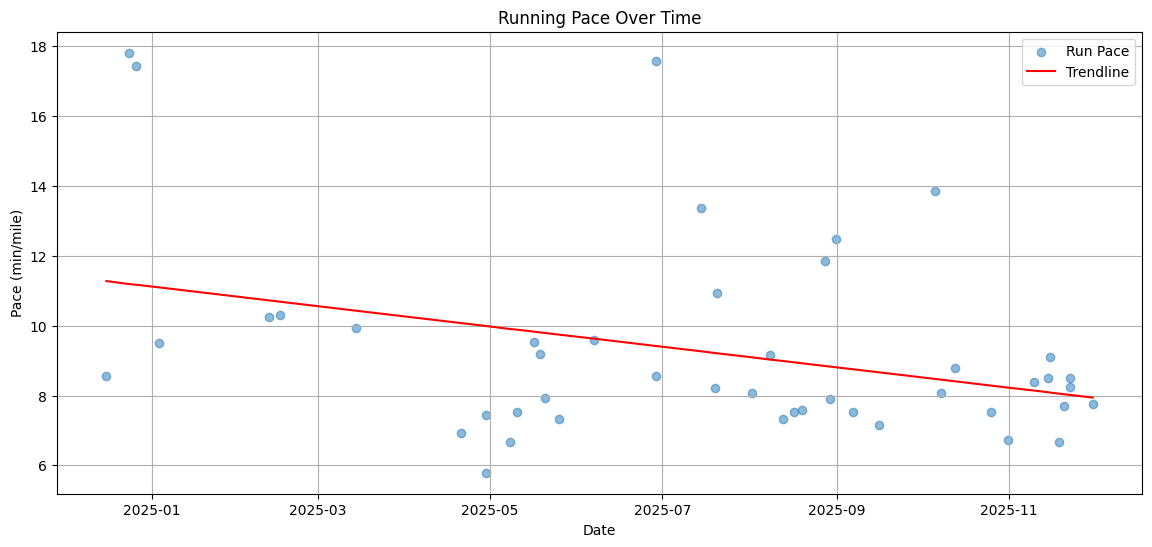

Slope of the trend: -0.009528045173054264


In [13]:
# use time series analysis to plot the raw data

# Plotting
plt.figure(figsize=(14, 6))
plt.scatter(df['Activity Date'], df['Pace'], alpha=0.5, label='Run Pace')

# Add a trendline
# Convert dates to numbers for polyfit
dates = df['Activity Date'].map(pd.Timestamp.toordinal)
z = np.polyfit(dates, df['Pace'], 1)
p = np.poly1d(z)

plt.plot(df['Activity Date'], p(dates), "r", label='Trendline')

plt.title('Running Pace Over Time')
plt.xlabel('Date')
plt.ylabel('Pace (min/mile)')
plt.legend()
plt.grid(True)
plt.show()

print("Slope of the trend: " + str(z[0]))

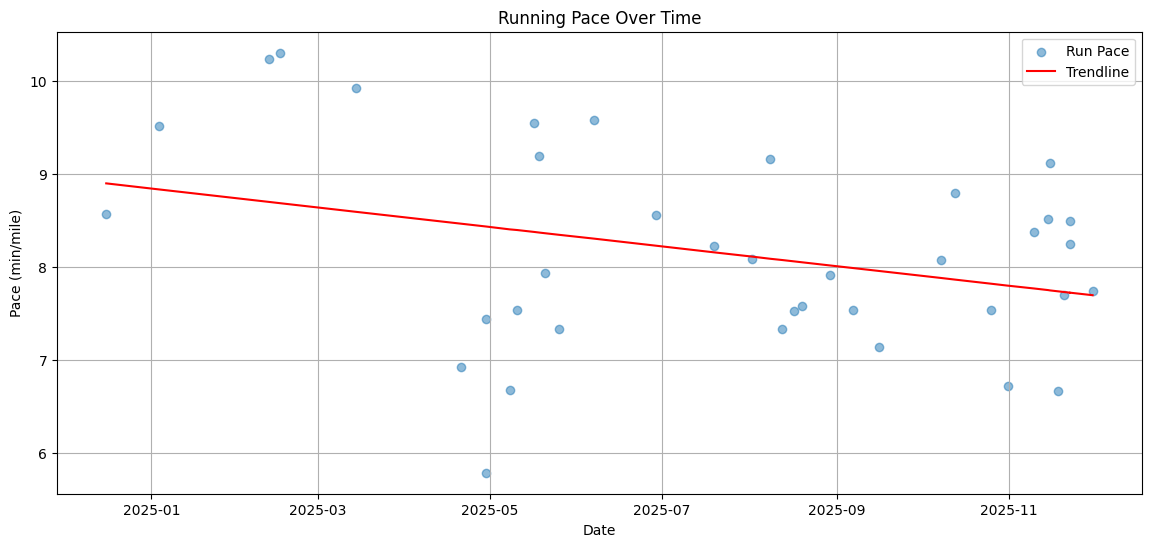

Slope of the trend: -0.0034309310350909912


In [ ]:
# remove outliers based on hand calculated z-score


mean_pace = df['Pace'].mean()
std_pace = df['Pace'].std()

df = df[(df['Pace'] >= mean_pace - 2 * std_pace) & (df['Pace'] <= mean_pace + 2 * std_pace)]



# ORIGINAL GRAPH AFTER OUTLIER REMOVAL:

# use time series analysis to plot the raw data
# Plotting
plt.figure(figsize=(14, 6))
plt.scatter(df['Activity Date'], df['Pace'], alpha=0.5, label='Run Pace')

# Add a trendline
# Convert dates to numbers for polyfit
dates = df['Activity Date'].map(pd.Timestamp.toordinal)
z = np.polyfit(dates, df['Pace'], 1)
p = np.poly1d(z)

plt.plot(df['Activity Date'], p(dates), "r", label='Trendline')

plt.title('Running Pace Over Time')
plt.xlabel('Date')
plt.ylabel('Pace (min/mile)')
plt.legend()
plt.grid(True)
plt.savefig('pace_trend.png')
plt.show()

print("Slope of the trend: " + str(z[0]))

Create a adjusted pace that factors in elevation and miles

My inituation is that elevation gain slows me down and elevation loss speeds me up 
Also it is harder to run longer distances so that should factor in too

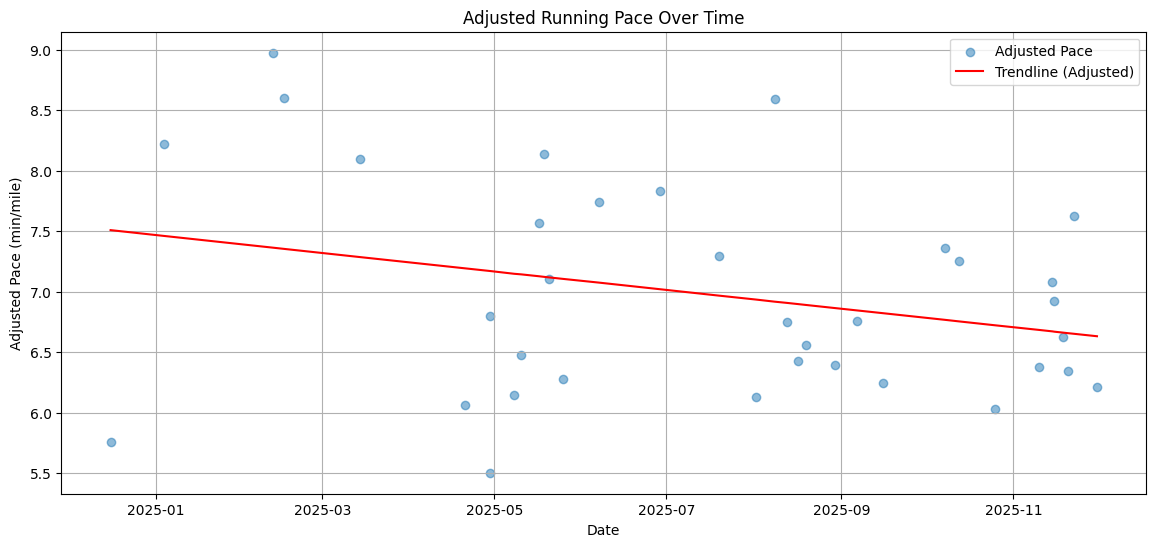

Slope of the trend: -0.0025051360979688273


In [ ]:
# Create a adjusted pace that factors in elevation and miles


# Feature Engineering using lin reg

df['Gain_Per_Mile'] = df['Elevation Gain'] / df['Distance']
df['Loss_Per_Mile'] = df['Elevation Loss'] / df['Distance']

# Define reg_df for regression
regDf = df.dropna(subset=['Pace', 'Distance', 'Gain_Per_Mile', 'Loss_Per_Mile'])
regDf = regDf[np.isfinite(regDf['Pace']) & (regDf['Distance'] > 0)]

X = regDf[['Distance', 'Gain_Per_Mile', 'Loss_Per_Mile']].values
X = np.c_[np.ones(X.shape[0]), X]
y = regDf['Pace'].values


theta, residuals, rank, s = np.linalg.lstsq(X, y, rcond=None)
intercept, c_dist, c_gain, c_loss = theta


# calc / add in the Adjusted Pace

adjustment = (c_dist * df['Distance']) + (c_gain * df['Gain_Per_Mile']) + (c_loss * df['Loss_Per_Mile'])
df['Adjusted_Pace'] = df['Pace'] - adjustment


# ORIGINAL GRAPH AFTER OUTLIER REMOVAL and ADJUSTED PACE:
df = df.sort_values('Activity Date')
df = df.dropna(subset=['Adjusted_Pace'])
df = df[np.isfinite(df['Adjusted_Pace'])]

plt.figure(figsize=(14, 6))
plt.scatter(df['Activity Date'], df['Adjusted_Pace'], alpha=0.5, label='Adjusted Pace')

# Add a trendline
# Convert dates to numbers for polyfit
dates = df['Activity Date'].map(pd.Timestamp.toordinal)
z = np.polyfit(dates, df['Adjusted_Pace'], 1)
p = np.poly1d(z)

plt.plot(df['Activity Date'], p(dates), "r", label='Trendline (Adjusted)')

plt.title('Adjusted Running Pace Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Pace (min/mile)')
plt.legend()
plt.grid(True)
plt.savefig('adjusted_pace_trend.png')
plt.show()

print("Slope of the trend: " + str(z[0]))

Conclusion / Analysis
All three slopes are negative, indicating that I am accelerating. Since the y-axis is Pace (minutes per mile), a negative slope suggests your time per mile is dropping. Over time, you are steadily increasing your speed.

The original data was skewed by outliers: The first slope (-0.0095) was substantially steeper than the second (-0.0016). This means that your initial data likely contained some outliers (maybe walking activities classified as runs, or GPS errors) that made your improvement look more dramatic than it was. Your actual improvement is more accurately reflected in the second slope.

Real Gains in Fitness: Comparing the second slope (Raw Pace: -0.001635) with the third slope (Adjusted Pace: -0.001637) yields the most significant insight. as They are practically identical!

Given these current points, yes I could build a model; though as seen in my refelction about my data a mere 40 rows is not enough to build a accurate model espcially not linear regression when we have 10+ importnant predictors. Future solution: go and run more!!!

In [23]:


def predict_run(distance_miles, elevation_gain_ft=0, elevation_loss_ft=0):
    
    # Convert feet to meters (since our model was trained on meters)
    # 1 ft = 0.3048 meters
    gain_meters = elevation_gain_ft * 0.3048
    loss_meters = elevation_loss_ft * 0.3048
    
    # Calculate densities
    gain_per_mile = gain_meters / distance_miles
    loss_per_mile = loss_meters / distance_miles
    
    # Predict Pace using the regression formula:
    
    predicted_pace = intercept + (c_dist * distance_miles) + (c_gain * gain_per_mile) + (c_loss * loss_per_mile)
    
    # Calculate Total Time
    total_minutes = predicted_pace * distance_miles
    
    # Format time as HH:MM:SS
    hours = int(total_minutes // 60)
    minutes = int(total_minutes % 60)
    seconds = int((total_minutes * 60) % 60)
    
    print(f"--- Prediction for {distance_miles} miles with +{elevation_gain_ft}ft / -{elevation_loss_ft}ft ---")
    print(f"Predicted Pace: {int(predicted_pace)}:{int((predicted_pace % 1) * 60):02d} min/mile")
    print(f"Predicted Total Time: {hours}:{minutes:02d}:{seconds:02d}")
    print("-" * 60)

# Example Predictions


predict_run(3.1, 0, 0)

# 2. A hilly 10k (6.2 miles) with 500ft gain and loss
predict_run(6.2, 500, 500)

# 3. A Half Marathon (13.1 miles) mostly flat
predict_run(13.1, 100, 100)

# 4. A Marathon (26.2 miles)
predict_run(26.2, 500, 500)

--- Prediction for 3.1 miles with +0ft / -0ft ---
Predicted Pace: 7:45 min/mile
Predicted Total Time: 0:24:02
------------------------------------------------------------
--- Prediction for 6.2 miles with +500ft / -500ft ---
Predicted Pace: 9:02 min/mile
Predicted Total Time: 0:56:05
------------------------------------------------------------
--- Prediction for 13.1 miles with +100ft / -100ft ---
Predicted Pace: 10:19 min/mile
Predicted Total Time: 2:15:09
------------------------------------------------------------
--- Prediction for 26.2 miles with +500ft / -500ft ---
Predicted Pace: 13:40 min/mile
Predicted Total Time: 5:58:24
------------------------------------------------------------
